In [101]:
#import required packages
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import earthpy as et
import pandas as pd
import pickle
import matplotlib.patches as mpatches

#read in the city info table
os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT'))
CITY_COUNTRY_lat_lon = pd.read_excel('CITY_COUNTRY_lat_lon.xlsx', index_col=None)

In [89]:
CITY_COUNTRY = "RIBEIRAO_BRAZIL"

#read in the tables
#read in the climate variables
os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT', 'ERA5', 'Overall'))
with open('clim_mon_tp', 'rb') as f:
    all_cities_mon_tp = pickle.load(f)

with open('clim_mon_t2m', 'rb') as f:
    all_cities_mon_t2m = pickle.load(f)

with open('clim_mon_rh', 'rb') as f:
    all_cities_mon_rh = pickle.load(f)

with open('clim_yr_tp', 'rb') as f:
    all_cities_yr_tp = pickle.load(f)
    
with open('clim_yr_t2m', 'rb') as f:
    all_cities_yr_t2m = pickle.load(f)

with open('clim_yr_rh', 'rb') as f:
    all_cities_yr_rh = pickle.load(f)

#read in parameters

City_name = CITY_COUNTRY_lat_lon[CITY_COUNTRY_lat_lon['CITY_COUNTRY'] == CITY_COUNTRY]['City'].values[0]
City_Lat = CITY_COUNTRY_lat_lon[CITY_COUNTRY_lat_lon['CITY_COUNTRY'] == CITY_COUNTRY]['Lat'].values[0]
City_Lon = CITY_COUNTRY_lat_lon[CITY_COUNTRY_lat_lon['CITY_COUNTRY'] == CITY_COUNTRY]['Lon'].values[0]

pickle_name = '{}_clim_df'.format(City_name)
with open(pickle_name, 'rb') as f:
    clim_df = pickle.load(f)

    
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))

#Read pickle files in 

#day time averages
pickle_name = 'monthly_day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    terra_monthly_day_df = pickle.load(f)
pickle_name = 'annual_day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    terra_annual_day_df = pickle.load(f)
#night time averages
pickle_name = 'monthly_night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    terra_monthly_night_df = pickle.load(f)
pickle_name = 'annual_night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    terra_annual_night_df = pickle.load(f)

#all parameters
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    terra_parameters_day = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    terra_parameters_night = pickle.load(f)
       
    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))

#Read pickle files in 

#day time averages
pickle_name = 'monthly_day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    aqua_monthly_day_df = pickle.load(f)
pickle_name = 'annual_day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    aqua_annual_day_df = pickle.load(f)
#night time averages
pickle_name = 'monthly_night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    aqua_monthly_night_df = pickle.load(f)
pickle_name = 'annual_night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    aqua_annual_night_df = pickle.load(f)

#all parameters
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    aqua_parameters_day = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    aqua_parameters_night = pickle.load(f)

In [90]:
#add clim vars to parameters table
#terra
terra_monthly_day_df['tp'] = all_cities_mon_tp[City_name]
terra_monthly_day_df['t2m'] = all_cities_mon_t2m[City_name]
terra_monthly_day_df['rh'] = all_cities_mon_rh[City_name]

terra_monthly_night_df['tp'] = all_cities_mon_tp[City_name]
terra_monthly_night_df['t2m'] = all_cities_mon_t2m[City_name]
terra_monthly_night_df['rh'] = all_cities_mon_rh[City_name]

#aqua
aqua_monthly_day_df['tp'] = all_cities_mon_tp[City_name]
aqua_monthly_day_df['t2m'] = all_cities_mon_t2m[City_name]
aqua_monthly_day_df['rh'] = all_cities_mon_rh[City_name]

aqua_monthly_night_df['tp'] = all_cities_mon_tp[City_name]
aqua_monthly_night_df['t2m'] = all_cities_mon_t2m[City_name]
aqua_monthly_night_df['rh'] = all_cities_mon_rh[City_name]

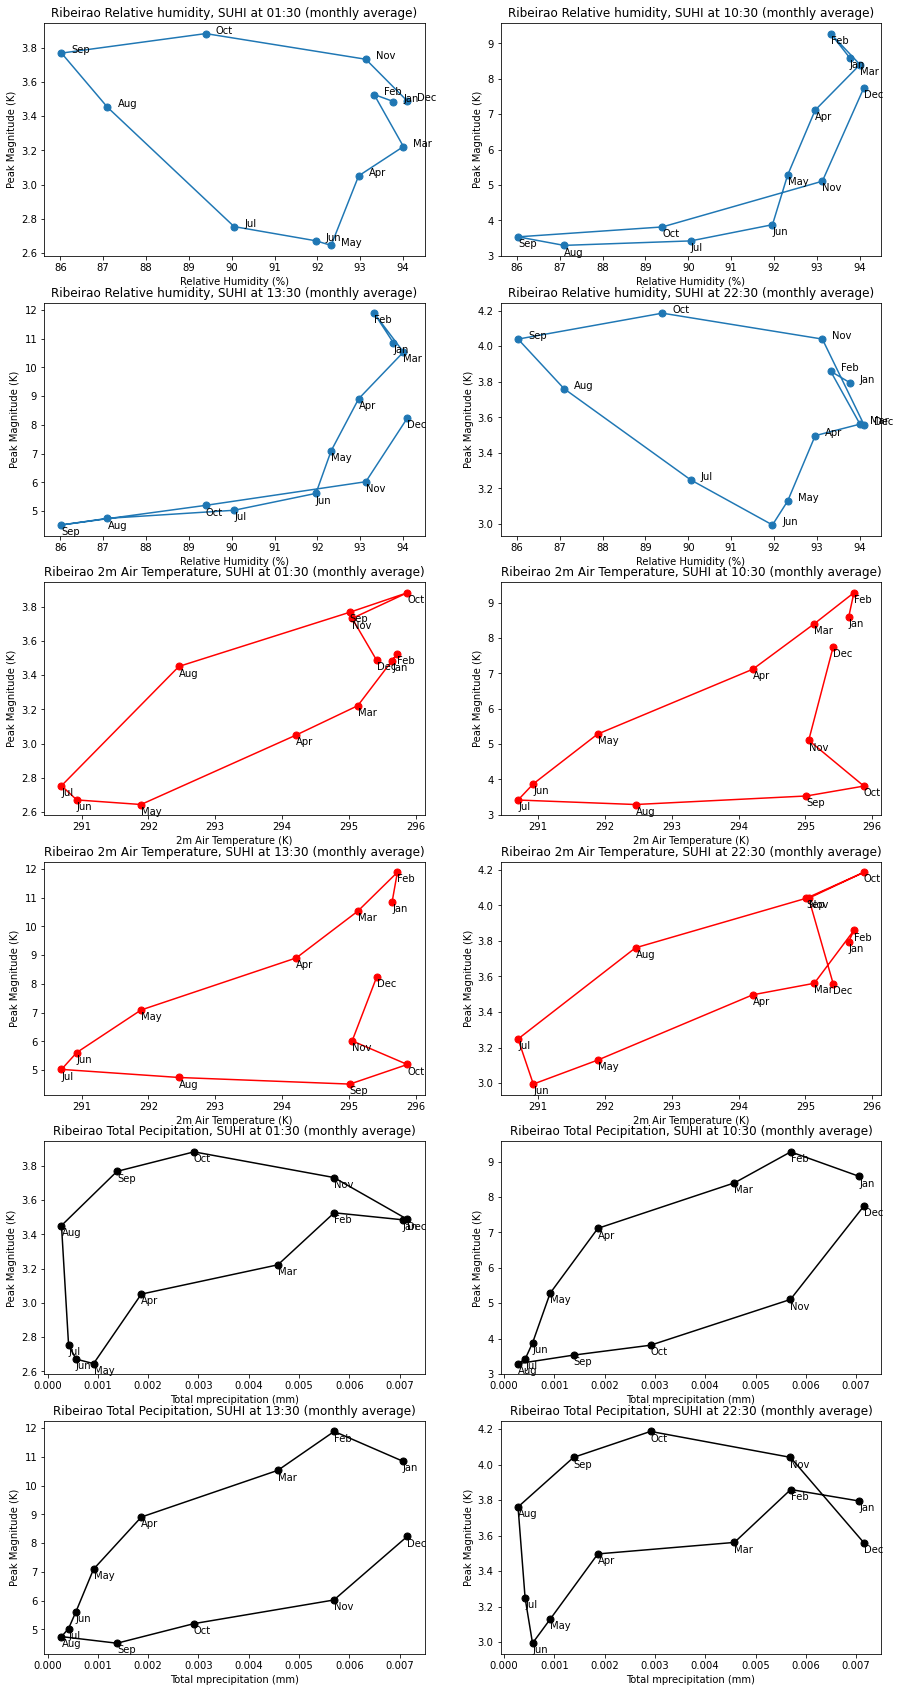

In [91]:
#plot

fig, axes = plt.subplots(nrows = 6,ncols = 2, figsize=(15, 30))
#month_list = monthly_day_df.Month.values
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov','Dec']

#rel humidity
axes[0,0].plot(aqua_monthly_night_df.rh, aqua_monthly_night_df.night_a0, marker = '.', markersize = 14)
axes[0,0].set_title('{} Relative humidity, SUHI at 01:30 (monthly average)'.format(City_name))
axes[0,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')
for i, txt in enumerate(month_list):
    axes[0,0].annotate(txt, (aqua_monthly_night_df.rh[i], aqua_monthly_night_df.night_a0[i]), xytext=(10,0), textcoords='offset points')
    
axes[0,1].plot(terra_monthly_day_df.rh, terra_monthly_day_df.day_a0, marker = '.', markersize = 14)
axes[0,1].set_title('{} Relative humidity, SUHI at 10:30 (monthly average)'.format(City_name))
axes[0,1].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')
for i, txt in enumerate(month_list):
    axes[0,1].annotate(txt, (terra_monthly_day_df.rh[i], terra_monthly_day_df.day_a0[i]), xytext=(0,-10), textcoords='offset points')

axes[1,0].plot(aqua_monthly_day_df.rh, aqua_monthly_day_df.day_a0, marker = '.', markersize = 14)
axes[1,0].set_title('{} Relative humidity, SUHI at 13:30 (monthly average)'.format(City_name))
axes[1,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')
for i, txt in enumerate(month_list):
    axes[1,0].annotate(txt, (aqua_monthly_day_df.rh[i], aqua_monthly_day_df.day_a0[i]), xytext=(0,-10), textcoords='offset points')
        
axes[1,1].plot(terra_monthly_night_df.rh, terra_monthly_night_df.night_a0, marker = '.', markersize = 14)
axes[1,1].set_title('{} Relative humidity, SUHI at 22:30 (monthly average)'.format(City_name))
axes[1,1].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')
for i, txt in enumerate(month_list):
    axes[1,1].annotate(txt, (terra_monthly_night_df.rh[i], terra_monthly_night_df.night_a0[i]), xytext=(10,0), textcoords='offset points')   
    
#2m air temp    
axes[2,0].plot(aqua_monthly_night_df.t2m, aqua_monthly_night_df.night_a0, marker = '.', markersize = 14, color = 'red')
axes[2,0].set_title('{} 2m Air Temperature, SUHI at 01:30 (monthly average)'.format(City_name))
axes[2,0].set(ylabel = 'Peak Magnitude (K)', xlabel = '2m Air Temperature (K)')
for i, txt in enumerate(month_list):
    axes[2,0].annotate(txt, (aqua_monthly_night_df.t2m[i], aqua_monthly_night_df.night_a0[i]), xytext=(0,-10), textcoords='offset points')
    
axes[2,1].plot(terra_monthly_day_df.t2m, terra_monthly_day_df.day_a0, marker = '.', markersize = 14, color = 'red')
axes[2,1].set_title('{} 2m Air Temperature, SUHI at 10:30 (monthly average)'.format(City_name))
axes[2,1].set(ylabel = 'Peak Magnitude (K)', xlabel = '2m Air Temperature (K)')
for i, txt in enumerate(month_list):
    axes[2,1].annotate(txt, (terra_monthly_day_df.t2m[i], terra_monthly_day_df.day_a0[i]), xytext=(0,-10), textcoords='offset points')

axes[3,0].plot(aqua_monthly_day_df.t2m, aqua_monthly_day_df.day_a0, marker = '.', markersize = 14, color = 'red')
axes[3,0].set_title('{} 2m Air Temperature, SUHI at 13:30 (monthly average)'.format(City_name))
axes[3,0].set(ylabel = 'Peak Magnitude (K)', xlabel = '2m Air Temperature (K)')
for i, txt in enumerate(month_list):
    axes[3,0].annotate(txt, (aqua_monthly_day_df.t2m[i], aqua_monthly_day_df.day_a0[i]), xytext=(0,-10), textcoords='offset points')

axes[3,1].plot(terra_monthly_night_df.t2m, terra_monthly_night_df.night_a0, marker = '.', markersize = 14, color = 'red')
axes[3,1].set_title('{} 2m Air Temperature, SUHI at 22:30 (monthly average)'.format(City_name))
axes[3,1].set(ylabel = 'Peak Magnitude (K)', xlabel = '2m Air Temperature (K)')
for i, txt in enumerate(month_list):
    axes[3,1].annotate(txt, (terra_monthly_night_df.t2m[i], terra_monthly_night_df.night_a0[i]), xytext=(0,-10), textcoords='offset points')

    
#precipiation       
axes[4,0].plot(aqua_monthly_night_df.tp, aqua_monthly_night_df.night_a0, marker = '.', markersize = 14, color = 'black')
axes[4,0].set_title('{} Total Pecipitation, SUHI at 01:30 (monthly average)'.format(City_name))
axes[4,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Total mprecipitation (mm)')
for i, txt in enumerate(month_list):
    axes[4,0].annotate(txt, (aqua_monthly_night_df.tp[i], aqua_monthly_night_df.night_a0[i]), xytext=(0,-10), textcoords='offset points')

axes[4,1].plot(terra_monthly_day_df.tp, terra_monthly_day_df.day_a0, marker = '.', markersize = 14, color = 'black')
axes[4,1].set_title('{} Total Pecipitation, SUHI at 10:30 (monthly average)'.format(City_name))
axes[4,1].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Total mprecipitation (mm)')
for i, txt in enumerate(month_list):
    axes[4,1].annotate(txt, (terra_monthly_day_df.tp[i], terra_monthly_day_df.day_a0[i]), xytext=(0,-10), textcoords='offset points')

axes[5,0].plot(aqua_monthly_day_df.tp, aqua_monthly_day_df.day_a0, marker = '.', markersize = 14, color = 'black')
axes[5,0].set_title('{} Total Pecipitation, SUHI at 13:30 (monthly average)'.format(City_name))
axes[5,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Total mprecipitation (mm)')
for i, txt in enumerate(month_list):
    axes[5,0].annotate(txt, (aqua_monthly_day_df.tp[i], aqua_monthly_day_df.day_a0[i]), xytext=(0,-10), textcoords='offset points')

axes[5,1].plot(terra_monthly_night_df.tp, terra_monthly_night_df.night_a0, marker = '.', markersize = 14, color = 'black')
axes[5,1].set_title('{} Total Pecipitation, SUHI at 22:30 (monthly average)'.format(City_name))
axes[5,1].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Total mprecipitation (mm)')
for i, txt in enumerate(month_list):
    axes[5,1].annotate(txt, (terra_monthly_night_df.tp[i], terra_monthly_night_df.night_a0[i]), xytext=(0,-10), textcoords='offset points')

#change the filepath to whereto save 
os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT','Graphs_outputs', 'seasonal_cycle_figures'))   
#save 
plt.savefig('{}_SUHI_mag_v_climate.png'.format(City_name))

In [92]:
#plot all the months
#group the parameters df by year and month

#terra

#cut of after 2020.10 (this is when clim df goes up to)
todrop_indx = terra_parameters_day[((terra_parameters_day['Year'] == 2020) 
                                    & (terra_parameters_day['Month'] > 10)) | (terra_parameters_day['Year'] == 2021)].index
terra_parameters_day_mod = terra_parameters_day.drop(todrop_indx)
#cut off before 2002 (this is where clim df starts - maybe change this)
todrop_indx = terra_parameters_day[(terra_parameters_day['Year'] <2002)].index
terra_parameters_day_mod = terra_parameters_day_mod.drop(todrop_indx)

grp = terra_parameters_day_mod.groupby(['Year','Month'])
terra_yr_mon_averages = grp.aggregate({"day_a0":np.mean, "method_2_SUHI":np.mean})

clim_grp = clim_df.groupby(['year','month'])
yr_mon_clim_avgs = clim_grp.aggregate({"t2m":np.mean, "tp":np.mean, "rh":np.mean})

#reset index so can reference months and years
terra_yr_mon_averages = terra_yr_mon_averages.reset_index()
yr_mon_clim_avgs = yr_mon_clim_avgs.reset_index()

#merge the datasets 
terra_yr_mon_averages = pd.merge(yr_mon_clim_avgs, terra_yr_mon_averages,  
                                 how='left', left_on=['year','month'], right_on = ['Year','Month'])

#nighttime 

#cut of after 2020.10 (this is when clim df goes up to)
todrop_indx = terra_parameters_night[((terra_parameters_night['Year'] == 2020) 
                                      & (terra_parameters_night['Month'] > 10)) | (terra_parameters_night['Year'] == 2021)].index
terra_parameters_night_mod = terra_parameters_night.drop(todrop_indx)
#cut off before 2002 (this is where clim df starts - maybe change this)
todrop_indx = terra_parameters_night[(terra_parameters_night['Year'] <2002)].index
terra_parameters_night_mod = terra_parameters_night_mod.drop(todrop_indx)

nt_grp = terra_parameters_night_mod.groupby(['Year','Month'])
terra_nt_yr_mon_averages = nt_grp.aggregate({"night_a0":np.mean, "method_2_SUHI":np.mean})

#reset index so can reference months and years
terra_nt_yr_mon_averages = terra_nt_yr_mon_averages.reset_index()
yr_mon_clim_avgs = yr_mon_clim_avgs.reset_index()

#merge the datasets
terra_night_yr_mon_averages = pd.merge(yr_mon_clim_avgs, terra_nt_yr_mon_averages,  
                                 how='left', left_on=['year','month'], right_on = ['Year','Month'])


#aqua

#cut of after 2020.10 (this is when clim df goes up to)
todrop_indx = aqua_parameters_day[((aqua_parameters_day['Year'] == 2020) 
                                    & (aqua_parameters_day['Month'] > 10)) | (aqua_parameters_day['Year'] == 2021)].index
aqua_parameters_day_mod = aqua_parameters_day.drop(todrop_indx)
#cut off before 2002 (this is where clim df starts - maybe change this)
todrop_indx = aqua_parameters_day[(aqua_parameters_day['Year'] <2002)].index
aqua_parameters_day_mod = aqua_parameters_day_mod.drop(todrop_indx)

grp = aqua_parameters_day_mod.groupby(['Year','Month'])
aqua_yr_mon_averages = grp.aggregate({"day_a0":np.mean, "method_2_SUHI":np.mean})

clim_grp = clim_df.groupby(['year','month'])
yr_mon_clim_avgs = clim_grp.aggregate({"t2m":np.mean, "tp":np.mean, "rh":np.mean})

#reset index so can reference months and years
aqua_yr_mon_averages = aqua_yr_mon_averages.reset_index()
yr_mon_clim_avgs = yr_mon_clim_avgs.reset_index()

#merge the datasets
aqua_yr_mon_averages = pd.merge(yr_mon_clim_avgs, aqua_yr_mon_averages,  
                                 how='left', left_on=['year','month'], right_on = ['Year','Month'])

#nighttime 

#cut of after 2020.10 (this is when clim df goes up to)
todrop_indx = aqua_parameters_night[((aqua_parameters_night['Year'] == 2020) 
                                      & (aqua_parameters_night['Month'] > 10)) | (aqua_parameters_night['Year'] == 2021)].index
aqua_parameters_night_mod = aqua_parameters_night.drop(todrop_indx)
#cut off before 2002 (this is where clim df starts - maybe change this)
todrop_indx = aqua_parameters_night[(aqua_parameters_night['Year'] <2002)].index
aqua_parameters_night_mod = aqua_parameters_night_mod.drop(todrop_indx)

nt_grp = aqua_parameters_night_mod.groupby(['Year','Month'])
aqua_nt_yr_mon_averages = nt_grp.aggregate({"night_a0":np.mean, "method_2_SUHI":np.mean})

#reset index so can reference months and years
aqua_nt_yr_mon_averages = aqua_nt_yr_mon_averages.reset_index()
yr_mon_clim_avgs = yr_mon_clim_avgs.reset_index()

#merge the datasets
aqua_night_yr_mon_averages = pd.merge(yr_mon_clim_avgs, aqua_nt_yr_mon_averages,  
                                 how='left', left_on=['year','month'], right_on = ['Year','Month'])


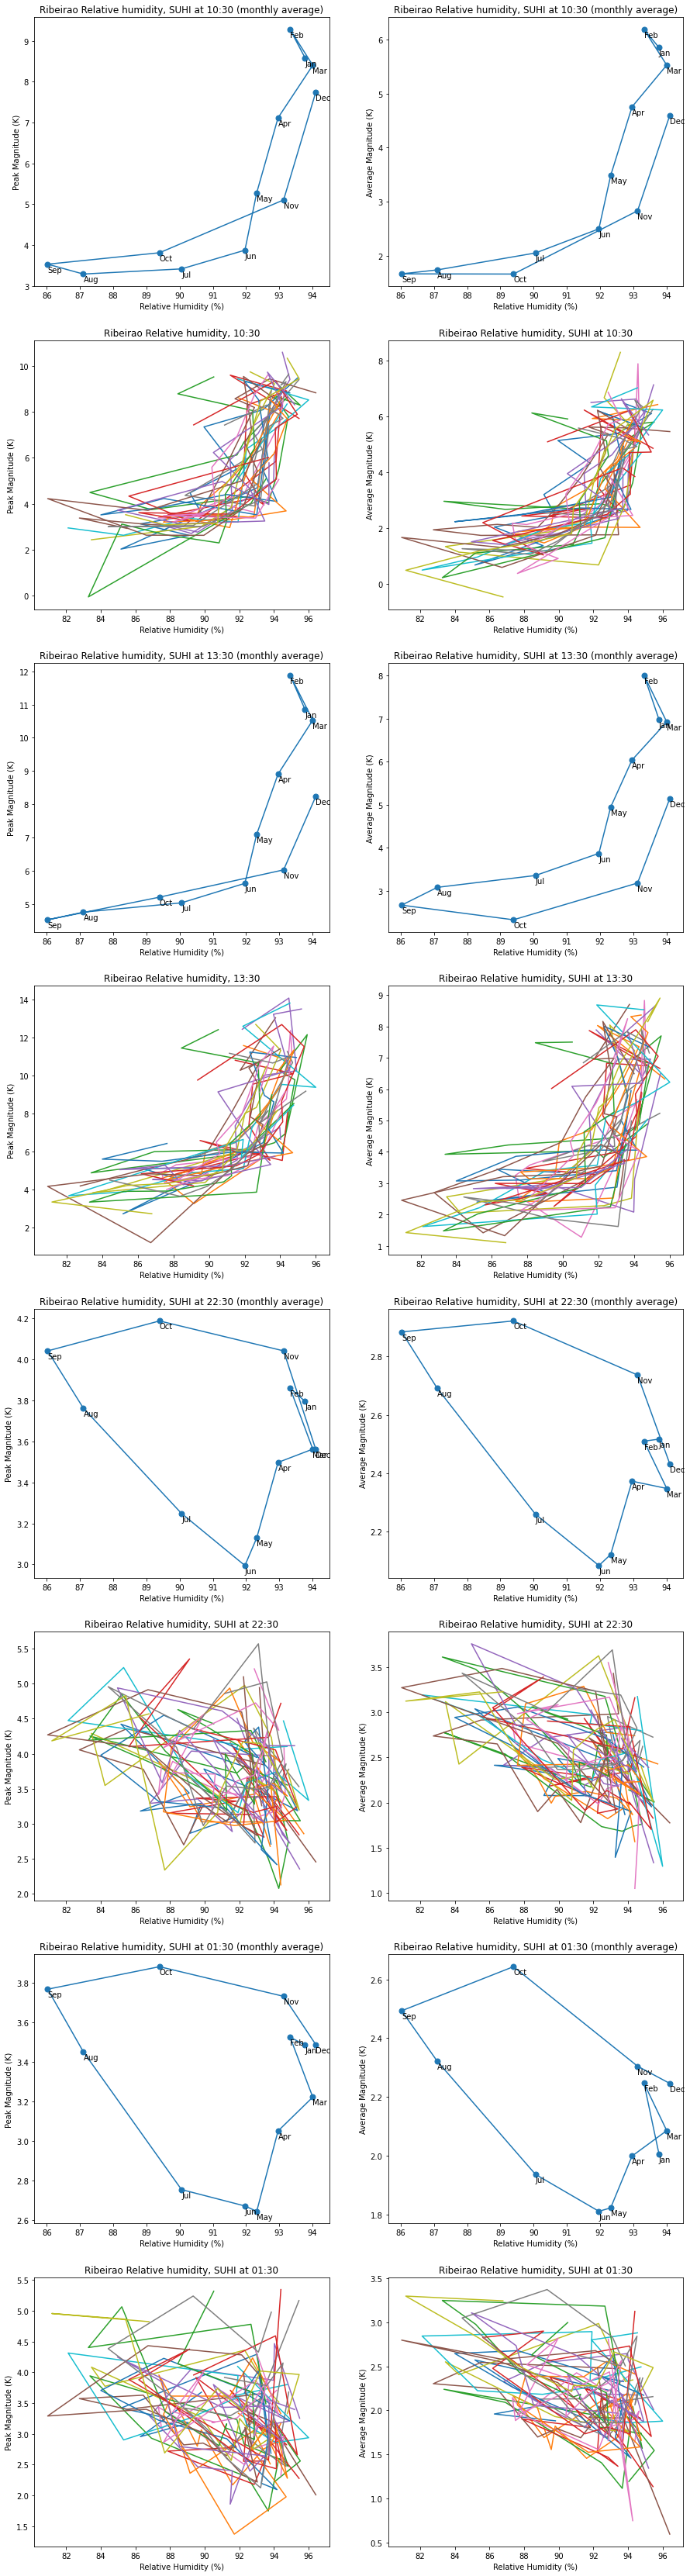

In [93]:
#plot

fig, axes = plt.subplots(nrows = 8,ncols = 2, figsize=(15, 60))
#month_list = monthly_day_df.Month.values
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov','Dec']
year_list = terra_yr_mon_averages.Year.unique()

#terra daytime
axes[0,0].plot(terra_monthly_day_df.rh, terra_monthly_day_df.day_a0, marker = '.', markersize = 14)
axes[0,0].set_title('{} Relative humidity, SUHI at 10:30 (monthly average)'.format(City_name))
axes[0,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')
for i, txt in enumerate(month_list):
    axes[0,0].annotate(txt, (terra_monthly_day_df.rh[i], terra_monthly_day_df.day_a0[i]), xytext=(0,-10), textcoords='offset points')

axes[0,1].plot(terra_monthly_day_df.rh, terra_monthly_day_df.method_2_SUHI, marker = '.', markersize = 14)
axes[0,1].set_title('{} Relative humidity, SUHI at 10:30 (monthly average)'.format(City_name))
axes[0,1].set(ylabel = 'Average Magnitude (K)', xlabel = 'Relative Humidity (%)')
for i, txt in enumerate(month_list):
    axes[0,1].annotate(txt, (terra_monthly_day_df.rh[i], terra_monthly_day_df.method_2_SUHI[i]), xytext=(0,-10), textcoords='offset points')

for x in range(len(year_list)):
    rh = terra_yr_mon_averages[terra_yr_mon_averages['Year'] == year_list[x]].rh
    day_a0 = terra_yr_mon_averages[terra_yr_mon_averages['Year'] == year_list[x]].day_a0
    axes[1,0].plot(rh, day_a0)#, marker = '.', markersize = 14)
    
axes[1,0].set_title('{} Relative humidity, 10:30'.format(City_name))
axes[1,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')
#for i, txt in enumerate(month_list):
#    axes[0,0].annotate(txt, (monthly_day_df.rh[i], monthly_day_df.day_a0[i]), xytext=(0,-10), textcoords='offset points')

for x in range(len(year_list)):
    rh = terra_yr_mon_averages[terra_yr_mon_averages['Year'] == year_list[x]].rh
    method_2_SUHI = terra_yr_mon_averages[terra_yr_mon_averages['Year'] == year_list[x]].method_2_SUHI
    axes[1,1].plot(rh, method_2_SUHI)#, marker = '.', markersize = 14)
    
axes[1,1].set_title('{} Relative humidity, SUHI at 10:30'.format(City_name))
axes[1,1].set(ylabel = 'Average Magnitude (K)', xlabel = 'Relative Humidity (%)')

#aqua daytime 
axes[2,0].plot(aqua_monthly_day_df.rh, aqua_monthly_day_df.day_a0, marker = '.', markersize = 14)
axes[2,0].set_title('{} Relative humidity, SUHI at 13:30 (monthly average)'.format(City_name))
axes[2,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')
for i, txt in enumerate(month_list):
    axes[2,0].annotate(txt, (aqua_monthly_day_df.rh[i], aqua_monthly_day_df.day_a0[i]), xytext=(0,-10), textcoords='offset points')

axes[2,1].plot(aqua_monthly_day_df.rh, aqua_monthly_day_df.method_2_SUHI, marker = '.', markersize = 14)
axes[2,1].set_title('{} Relative humidity, SUHI at 13:30 (monthly average)'.format(City_name))
axes[2,1].set(ylabel = 'Average Magnitude (K)', xlabel = 'Relative Humidity (%)')
for i, txt in enumerate(month_list):
    axes[2,1].annotate(txt, (aqua_monthly_day_df.rh[i], aqua_monthly_day_df.method_2_SUHI[i]), xytext=(0,-10), textcoords='offset points')

for x in range(len(year_list)):
    rh = aqua_yr_mon_averages[aqua_yr_mon_averages['Year'] == year_list[x]].rh
    day_a0 = aqua_yr_mon_averages[aqua_yr_mon_averages['Year'] == year_list[x]].day_a0
    axes[3,0].plot(rh, day_a0)#, marker = '.', markersize = 14)
    
axes[3,0].set_title('{} Relative humidity, 13:30'.format(City_name))
axes[3,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')
#for i, txt in enumerate(month_list):
#    axes[0,0].annotate(txt, (monthly_day_df.rh[i], monthly_day_df.day_a0[i]), xytext=(0,-10), textcoords='offset points')

for x in range(len(year_list)):
    rh = aqua_yr_mon_averages[aqua_yr_mon_averages['Year'] == year_list[x]].rh
    method_2_SUHI = aqua_yr_mon_averages[aqua_yr_mon_averages['Year'] == year_list[x]].method_2_SUHI
    axes[3,1].plot(rh, method_2_SUHI)#, marker = '.', markersize = 14)
    
axes[3,1].set_title('{} Relative humidity, SUHI at 13:30'.format(City_name))
axes[3,1].set(ylabel = 'Average Magnitude (K)', xlabel = 'Relative Humidity (%)')

#terra nighttime

axes[4,0].plot(terra_monthly_night_df.rh, terra_monthly_night_df.night_a0, marker = '.', markersize = 14)
axes[4,0].set_title('{} Relative humidity, SUHI at 22:30 (monthly average)'.format(City_name))
axes[4,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')
for i, txt in enumerate(month_list):
    axes[4,0].annotate(txt, (terra_monthly_night_df.rh[i], terra_monthly_night_df.night_a0[i]), xytext=(0,-10), textcoords='offset points')

axes[4,1].plot(terra_monthly_night_df.rh, terra_monthly_night_df.method_2_SUHI, marker = '.', markersize = 14)
axes[4,1].set_title('{} Relative humidity, SUHI at 22:30 (monthly average)'.format(City_name))
axes[4,1].set(ylabel = 'Average Magnitude (K)', xlabel = 'Relative Humidity (%)')
for i, txt in enumerate(month_list):
    axes[4,1].annotate(txt, (terra_monthly_night_df.rh[i], terra_monthly_night_df.method_2_SUHI[i]), xytext=(0,-10), textcoords='offset points')

for x in range(len(year_list)):
    rh = terra_night_yr_mon_averages[terra_night_yr_mon_averages['Year'] == year_list[x]].rh
    night_a0 = terra_night_yr_mon_averages[terra_night_yr_mon_averages['Year'] == year_list[x]].night_a0
    axes[5,0].plot(rh, night_a0)#, marker = '.', markersize = 14)   
axes[5,0].set_title('{} Relative humidity, SUHI at 22:30'.format(City_name))
axes[5,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')

for x in range(len(year_list)):
    rh = terra_night_yr_mon_averages[terra_night_yr_mon_averages['Year'] == year_list[x]].rh
    method_2_SUHI = terra_night_yr_mon_averages[terra_night_yr_mon_averages['Year'] == year_list[x]].method_2_SUHI
    axes[5,1].plot(rh, method_2_SUHI)#, marker = '.', markersize = 14)    
axes[5,1].set_title('{} Relative humidity, SUHI at 22:30'.format(City_name))
axes[5,1].set(ylabel = 'Average Magnitude (K)', xlabel = 'Relative Humidity (%)')
    
#aqua nighttime 
axes[6,0].plot(aqua_monthly_night_df.rh, aqua_monthly_night_df.night_a0, marker = '.', markersize = 14)
axes[6,0].set_title('{} Relative humidity, SUHI at 01:30 (monthly average)'.format(City_name))
axes[6,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')
for i, txt in enumerate(month_list):
    axes[6,0].annotate(txt, (aqua_monthly_night_df.rh[i], aqua_monthly_night_df.night_a0[i]), xytext=(0,-10), textcoords='offset points')

axes[6,1].plot(aqua_monthly_night_df.rh, aqua_monthly_night_df.method_2_SUHI, marker = '.', markersize = 14)
axes[6,1].set_title('{} Relative humidity, SUHI at 01:30 (monthly average)'.format(City_name))
axes[6,1].set(ylabel = 'Average Magnitude (K)', xlabel = 'Relative Humidity (%)')
for i, txt in enumerate(month_list):
    axes[6,1].annotate(txt, (aqua_monthly_night_df.rh[i], aqua_monthly_night_df.method_2_SUHI[i]), xytext=(0,-10), textcoords='offset points')

for x in range(len(year_list)):
    rh = aqua_night_yr_mon_averages[aqua_night_yr_mon_averages['Year'] == year_list[x]].rh
    night_a0 = aqua_night_yr_mon_averages[aqua_night_yr_mon_averages['Year'] == year_list[x]].night_a0
    axes[7,0].plot(rh, night_a0)#, marker = '.', markersize = 14)   
axes[7,0].set_title('{} Relative humidity, SUHI at 01:30'.format(City_name))
axes[7,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')

for x in range(len(year_list)):
    rh = aqua_night_yr_mon_averages[aqua_night_yr_mon_averages['Year'] == year_list[x]].rh
    method_2_SUHI = aqua_night_yr_mon_averages[aqua_night_yr_mon_averages['Year'] == year_list[x]].method_2_SUHI
    axes[7,1].plot(rh, method_2_SUHI)#, marker = '.', markersize = 14)    
axes[7,1].set_title('{} Relative humidity, SUHI at 01:30'.format(City_name))
axes[7,1].set(ylabel = 'Average Magnitude (K)', xlabel = 'Relative Humidity (%)')

plt.savefig('{}_SUHI_v_rh_seasonal_cycle.png'.format(City_name))

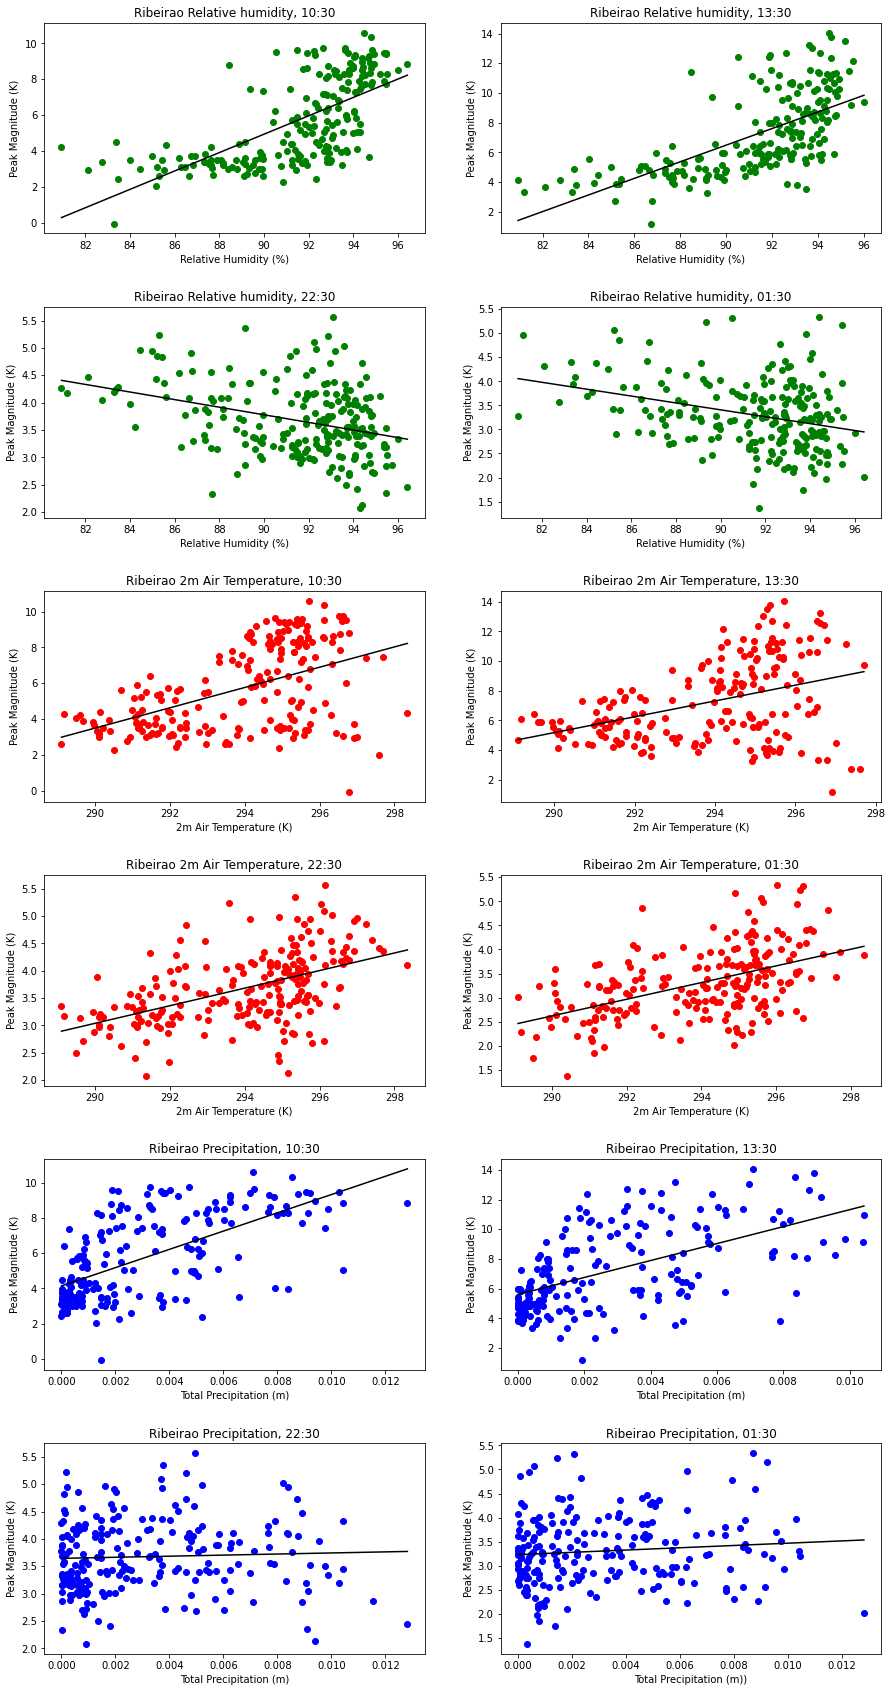

In [107]:
#plot climate variables against SUHI for each month

#plot

fig, axes = plt.subplots(nrows = 6,ncols = 2, figsize=(15, 30))
plt.subplots_adjust(hspace = 0.35)

#rel humidity
x = terra_yr_mon_averages[~np.isnan(terra_yr_mon_averages.day_a0)].rh #take values which are not nan
y = terra_yr_mon_averages[~np.isnan(terra_yr_mon_averages.day_a0)].day_a0
axes[0,0].scatter(x, y, color = 'green')   
axes[0,0].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
axes[0,0].set_title('{} Relative humidity, 10:30'.format(City_name))
axes[0,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')

x = aqua_yr_mon_averages[~np.isnan(aqua_yr_mon_averages.day_a0)].rh
y = aqua_yr_mon_averages[~np.isnan(aqua_yr_mon_averages.day_a0)].day_a0
axes[0,1].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
axes[0,1].scatter(x, y, color = 'green')        
axes[0,1].set_title('{} Relative humidity, 13:30'.format(City_name))
axes[0,1].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')

x = terra_night_yr_mon_averages[~np.isnan(terra_night_yr_mon_averages.night_a0)].rh
y = terra_night_yr_mon_averages[~np.isnan(terra_night_yr_mon_averages.night_a0)].night_a0
axes[1,0].scatter(x, y, color = 'green') 
axes[1,0].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
axes[1,0].set_title('{} Relative humidity, 22:30'.format(City_name))
axes[1,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')

x = aqua_night_yr_mon_averages[~np.isnan(aqua_night_yr_mon_averages.night_a0)].rh
y = aqua_night_yr_mon_averages[~np.isnan(aqua_night_yr_mon_averages.night_a0)].night_a0
axes[1,1].scatter(x, y, color = 'green')            
axes[1,1].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
axes[1,1].set_title('{} Relative humidity, 01:30'.format(City_name))
axes[1,1].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')

#2m air temp

x = terra_yr_mon_averages[~np.isnan(terra_yr_mon_averages.day_a0)].t2m
y = terra_yr_mon_averages[~np.isnan(terra_yr_mon_averages.day_a0)].day_a0
axes[2,0].scatter(x,y, color = 'red')
axes[2,0].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
axes[2,0].set_title('{} 2m Air Temperature, 10:30'.format(City_name))
axes[2,0].set(ylabel = 'Peak Magnitude (K)', xlabel = '2m Air Temperature (K)')

x = aqua_yr_mon_averages[~np.isnan(aqua_yr_mon_averages.day_a0)].t2m
y = aqua_yr_mon_averages[~np.isnan(aqua_yr_mon_averages.day_a0)].day_a0
axes[2,1].scatter(x,y, color = 'red')
axes[2,1].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
axes[2,1].set_title('{} 2m Air Temperature, 13:30'.format(City_name))
axes[2,1].set(ylabel = 'Peak Magnitude (K)', xlabel = '2m Air Temperature (K)')

x = terra_night_yr_mon_averages[~np.isnan(terra_night_yr_mon_averages.night_a0)].t2m
y = terra_night_yr_mon_averages[~np.isnan(terra_night_yr_mon_averages.night_a0)].night_a0
axes[3,0].scatter(x,y, color = 'red')
axes[3,0].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
axes[3,0].set_title('{} 2m Air Temperature, 22:30'.format(City_name))
axes[3,0].set(ylabel = 'Peak Magnitude (K)', xlabel = '2m Air Temperature (K)')

x = aqua_night_yr_mon_averages[~np.isnan(aqua_night_yr_mon_averages.night_a0)].t2m
y = aqua_night_yr_mon_averages[~np.isnan(aqua_night_yr_mon_averages.night_a0)].night_a0
axes[3,1].scatter(x,y, color = 'red')
axes[3,1].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
axes[3,1].set_title('{} 2m Air Temperature, 01:30'.format(City_name))
axes[3,1].set(ylabel = 'Peak Magnitude (K)', xlabel = '2m Air Temperature (K)')
    
#precipiation       
x = terra_yr_mon_averages[~np.isnan(terra_yr_mon_averages.day_a0)].tp
y = terra_yr_mon_averages[~np.isnan(terra_yr_mon_averages.day_a0)].day_a0
axes[4,0].scatter(x,y, color = 'blue')
axes[4,0].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
axes[4,0].set_title('{} Precipitation, 10:30'.format(City_name))
axes[4,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Total Precipitation (m)')

x = aqua_yr_mon_averages[~np.isnan(aqua_yr_mon_averages.day_a0)].tp
y = aqua_yr_mon_averages[~np.isnan(aqua_yr_mon_averages.day_a0)].day_a0
axes[4,1].scatter(x,y, color = 'blue')
axes[4,1].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
axes[4,1].set_title('{} Precipitation, 13:30'.format(City_name))
axes[4,1].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Total Precipitation (m)')

x = terra_night_yr_mon_averages[~np.isnan(terra_night_yr_mon_averages.night_a0)].tp
y = terra_night_yr_mon_averages[~np.isnan(terra_night_yr_mon_averages.night_a0)].night_a0
axes[5,0].scatter(x,y, color = 'blue')
axes[5,0].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
axes[5,0].set_title('{} Precipitation, 22:30'.format(City_name))
axes[5,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Total Precipitation (m)')

x = aqua_night_yr_mon_averages[~np.isnan(aqua_night_yr_mon_averages.night_a0)].tp
y = aqua_night_yr_mon_averages[~np.isnan(aqua_night_yr_mon_averages.night_a0)].night_a0 
axes[5,1].scatter(x,y, color = 'blue')
axes[5,1].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'black')
axes[5,1].set_title('{} Precipitation, 01:30'.format(City_name))
axes[5,1].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Total Precipitation (m))')

#change the filepath to whereto save 
os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT','Graphs_outputs','climate_SUHI_magnitude_plots'))   
#save 
plt.savefig('{}_SUHI_mag_v_climate_scatter.png'.format(City_name))

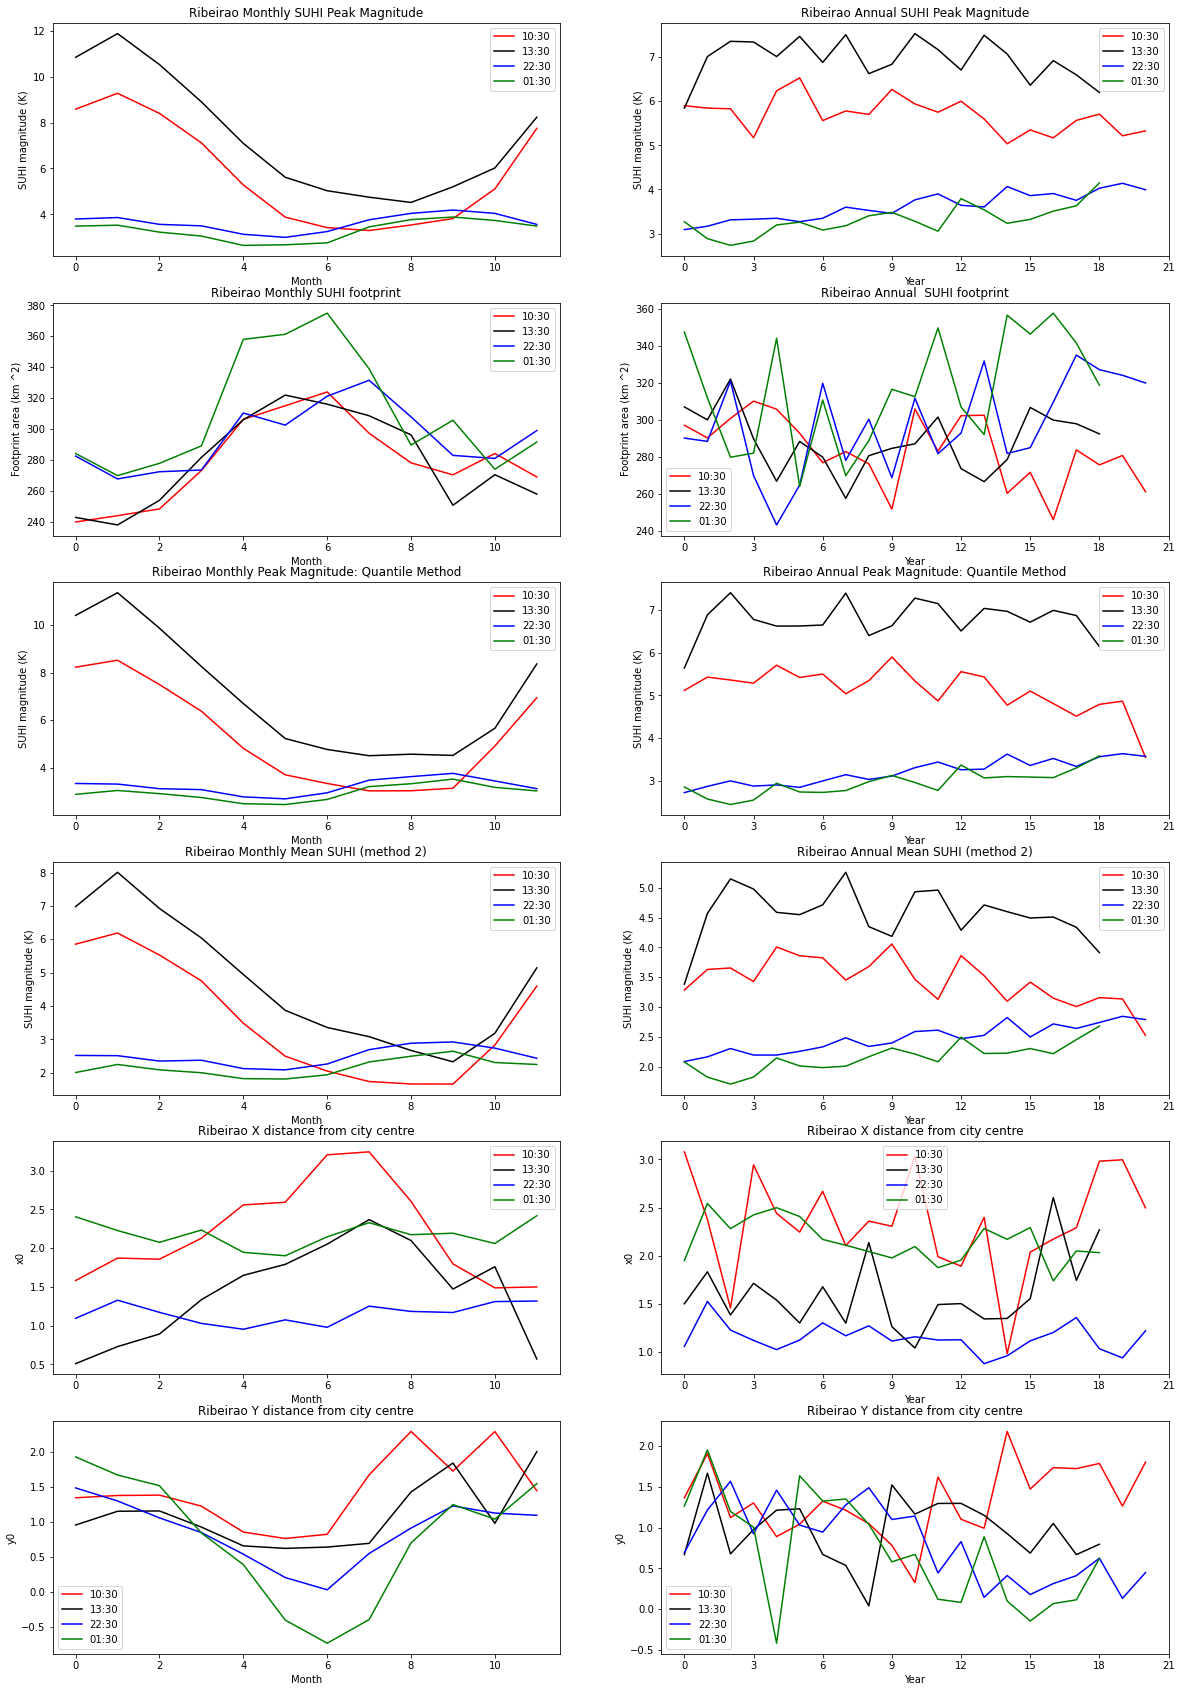

In [105]:
#plot the overpasses all on the same graphs
from matplotlib import ticker 
from matplotlib.ticker import MaxNLocator

fig, axes = plt.subplots(nrows = 6,ncols = 2, figsize=(20, 30))

axes[0,0].plot(terra_monthly_day_df.day_a0, color = 'red', label = '10:30')
axes[0,0].plot(aqua_monthly_day_df.day_a0, color = 'black', label = '13:30')
axes[0,0].plot(terra_monthly_night_df.night_a0, color = 'blue', label = '22:30')
axes[0,0].plot(aqua_monthly_night_df.night_a0, color = 'green', label = '01:30')
axes[0,0].set_title('{} Monthly SUHI Peak Magnitude'.format(City_name))
axes[0,0].set(xlabel = 'Month', ylabel = 'SUHI magnitude (K)')
axes[0,0].legend()


axes[0,1].plot(terra_annual_day_df.day_a0 , color = 'red', label = '10:30')
axes[0,1].plot(aqua_annual_day_df.day_a0, color = 'black', label = '13:30')
axes[0,1].plot(terra_annual_night_df.night_a0, color = 'blue', label = '22:30')
axes[0,1].plot(aqua_annual_night_df.night_a0, color = 'green', label = '01:30')
axes[0,1].set_title('{} Annual SUHI Peak Magnitude'.format(City_name))
axes[0,1].set(xlabel = 'Year', ylabel = 'SUHI magnitude (K)')
axes[0,1].legend()

axes[1,0].plot(terra_monthly_day_df.footprint_area, color = 'red', label = '10:30')
axes[1,0].plot(aqua_monthly_day_df.footprint_area, color = 'black', label = '13:30')
axes[1,0].plot(terra_monthly_night_df.footprint_area, color = 'blue', label = '22:30')
axes[1,0].plot(aqua_monthly_night_df.footprint_area, color = 'green', label = '01:30')
axes[1,0].set_title('{} Monthly SUHI footprint'.format(City_name))
axes[1,0].set(xlabel = 'Month', ylabel = 'Footprint area (km ^2)')
axes[1,0].legend()


axes[1,1].plot(terra_annual_day_df.footprint_area , color = 'red', label = '10:30')
axes[1,1].plot(aqua_annual_day_df.footprint_area, color = 'black', label = '13:30')
axes[1,1].plot(terra_annual_night_df.footprint_area, color = 'blue', label = '22:30')
axes[1,1].plot(aqua_annual_night_df.footprint_area, color = 'green', label = '01:30')
axes[1,1].set_title('{} Annual  SUHI footprint'.format(City_name))
axes[1,1].set(xlabel = 'Year', ylabel = 'Footprint area (km ^2)')
axes[1,1].legend()


axes[2,0].plot(terra_monthly_day_df.quantile_a0, color = 'red', label = '10:30')
axes[2,0].plot(aqua_monthly_day_df.quantile_a0, color = 'black', label = '13:30')
axes[2,0].plot(terra_monthly_night_df.quantile_a0, color = 'blue', label = '22:30')
axes[2,0].plot(aqua_monthly_night_df.quantile_a0, color = 'green', label = '01:30')
axes[2,0].set_title('{} Monthly Peak Magnitude: Quantile Method'.format(City_name))
axes[2,0].set(xlabel = 'Month', ylabel = 'SUHI magnitude (K)')
axes[2,0].legend()

axes[2,1].plot(terra_annual_day_df.quantile_a0 , color = 'red', label = '10:30')
axes[2,1].plot(aqua_annual_day_df.quantile_a0, color = 'black', label = '13:30')
axes[2,1].plot(terra_annual_night_df.quantile_a0, color = 'blue', label = '22:30')
axes[2,1].plot(aqua_annual_night_df.quantile_a0, color = 'green', label = '01:30')
axes[2,1].set_title('{} Annual Peak Magnitude: Quantile Method'.format(City_name))
axes[2,1].set(xlabel = 'Year', ylabel = 'SUHI magnitude (K)')
axes[2,1].legend()

axes[3,0].plot(terra_monthly_day_df.method_2_SUHI, color = 'red', label = '10:30')
axes[3,0].plot(aqua_monthly_day_df.method_2_SUHI, color = 'black', label = '13:30')
axes[3,0].plot(terra_monthly_night_df.method_2_SUHI, color = 'blue', label = '22:30')
axes[3,0].plot(aqua_monthly_night_df.method_2_SUHI, color = 'green', label = '01:30')
axes[3,0].set_title('{} Monthly Mean SUHI (method 2)'.format(City_name))
axes[3,0].set(xlabel = 'Month', ylabel = 'SUHI magnitude (K)')
axes[3,0].legend()

axes[3,1].plot(terra_annual_day_df.method_2_SUHI , color = 'red', label = '10:30')
axes[3,1].plot(aqua_annual_day_df.method_2_SUHI, color = 'black', label = '13:30')
axes[3,1].plot(terra_annual_night_df.method_2_SUHI, color = 'blue', label = '22:30')
axes[3,1].plot(aqua_annual_night_df.method_2_SUHI, color = 'green', label = '01:30')
axes[3,1].set_title('{} Annual Mean SUHI (method 2)'.format(City_name))
axes[3,1].set(xlabel = 'Year', ylabel = 'SUHI magnitude (K)')
axes[3,1].legend()

axes[4,0].plot(terra_monthly_day_df.day_x0, color = 'red', label = '10:30')
axes[4,0].plot(aqua_monthly_day_df.day_x0, color = 'black', label = '13:30')
axes[4,0].plot(terra_monthly_night_df.night_x0, color = 'blue', label = '22:30')
axes[4,0].plot(aqua_monthly_night_df.night_x0, color = 'green', label = '01:30')
axes[4,0].set_title('{} X distance from city centre'.format(City_name))
axes[4,0].set(xlabel = 'Month', ylabel = 'x0')
axes[4,0].legend()

axes[4,1].plot(terra_annual_day_df.day_x0 , color = 'red', label = '10:30')
axes[4,1].plot(aqua_annual_day_df.day_x0, color = 'black', label = '13:30')
axes[4,1].plot(terra_annual_night_df.night_x0, color = 'blue', label = '22:30')
axes[4,1].plot(aqua_annual_night_df.night_x0, color = 'green', label = '01:30')
axes[4,1].set_title('{} X distance from city centre'.format(City_name))
axes[4,1].set(xlabel = 'Year', ylabel = 'x0')
axes[4,1].legend()

axes[5,0].plot(terra_monthly_day_df.day_y0, color = 'red', label = '10:30')
axes[5,0].plot(aqua_monthly_day_df.day_y0, color = 'black', label = '13:30')
axes[5,0].plot(terra_monthly_night_df.night_y0, color = 'blue', label = '22:30')
axes[5,0].plot(aqua_monthly_night_df.night_y0, color = 'green', label = '01:30')
#axes[5,0].errorbar(x = range(1,13), y = monthly_averages.day_y0, yerr = monthly_std_dev.day_y0, color = 'c')
axes[5,0].set_title('{} Y distance from city centre'.format(City_name))
axes[5,0].set(xlabel = 'Month', ylabel = 'y0')
axes[5,0].legend()

axes[5,1].plot(terra_annual_day_df.day_y0 , color = 'red', label = '10:30')
axes[5,1].plot(aqua_annual_day_df.day_y0, color = 'black', label = '13:30')
axes[5,1].plot(terra_annual_night_df.night_y0, color = 'blue', label = '22:30')
axes[5,1].plot(aqua_annual_night_df.night_y0, color = 'green', label = '01:30')
axes[5,1].set_title('{} Y distance from city centre'.format(City_name))
axes[5,1].set(xlabel = 'Year', ylabel = 'y0')
axes[5,1].legend()

xa = axes[0,1].get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True)) #make sure the y axis sticks to integers as is by year
xa = axes[1,1].get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True)) 
xa = axes[2,1].get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True)) 
xa = axes[3,1].get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True)) 
xa = axes[4,1].get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True)) 
xa = axes[5,1].get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True)) 

#change to the file where want to save the graphs
os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT','Graphs_outputs','SUHI_characteristics_4_overpasses'))  
#save the plot as a png
plt.savefig('SUHI_trend_{}_4_overpasses.png'.format(City_name))

In [131]:
#Looking at day length

In [ ]:
# Calculating the day length
#code from  https://gist.github.com/anttilipp/ed3ab35258c7636d87de6499475301ce

def daylength(dayOfYear, lat):
    """Computes the length of the day (the time between sunrise and
    sunset) given the day of the year and latitude of the location.
    Function uses the Brock model for the computations.
    For more information see, for example,
    Forsythe et al., "A model comparison for daylength as a
    function of latitude and day of year", Ecological Modelling,
    1995.
    Parameters
    ----------
    dayOfYear : int
        The day of the year. 1 corresponds to 1st of January
        and 365 to 31st December (on a non-leap year).
    lat : float
        Latitude of the location in degrees. Positive values
        for north and negative for south.
    Returns
    -------
    d : float
        Daylength in hours.
    """
    latInRad = np.deg2rad(lat)
    declinationOfEarth = 23.45*np.sin(np.deg2rad(360.0*(283.0+dayOfYear)/365.0))
    if -np.tan(latInRad) * np.tan(np.deg2rad(declinationOfEarth)) <= -1.0:
        return 24.0
    elif -np.tan(latInRad) * np.tan(np.deg2rad(declinationOfEarth)) >= 1.0:
        return 0.0
    else:
        hourAngle = np.rad2deg(np.arccos(-np.tan(latInRad) * np.tan(np.deg2rad(declinationOfEarth))))
        return 2.0*hourAngle/15.0

In [ ]:
#add in day length
import datetime as dt
day_length_list = []
for i in range(len(monthly_day_df)):
    mon = monthly_day_df.Month[i]
    date = '15/{}/2015'.format(mon)
    day = dt.datetime.strptime(date, '%d/%m/%Y').strftime('%j')
    day_length = daylength(int(day), City_Lat)
    day_length_list.append(day_length)
    
monthly_day_df['day_length'] = day_length_list

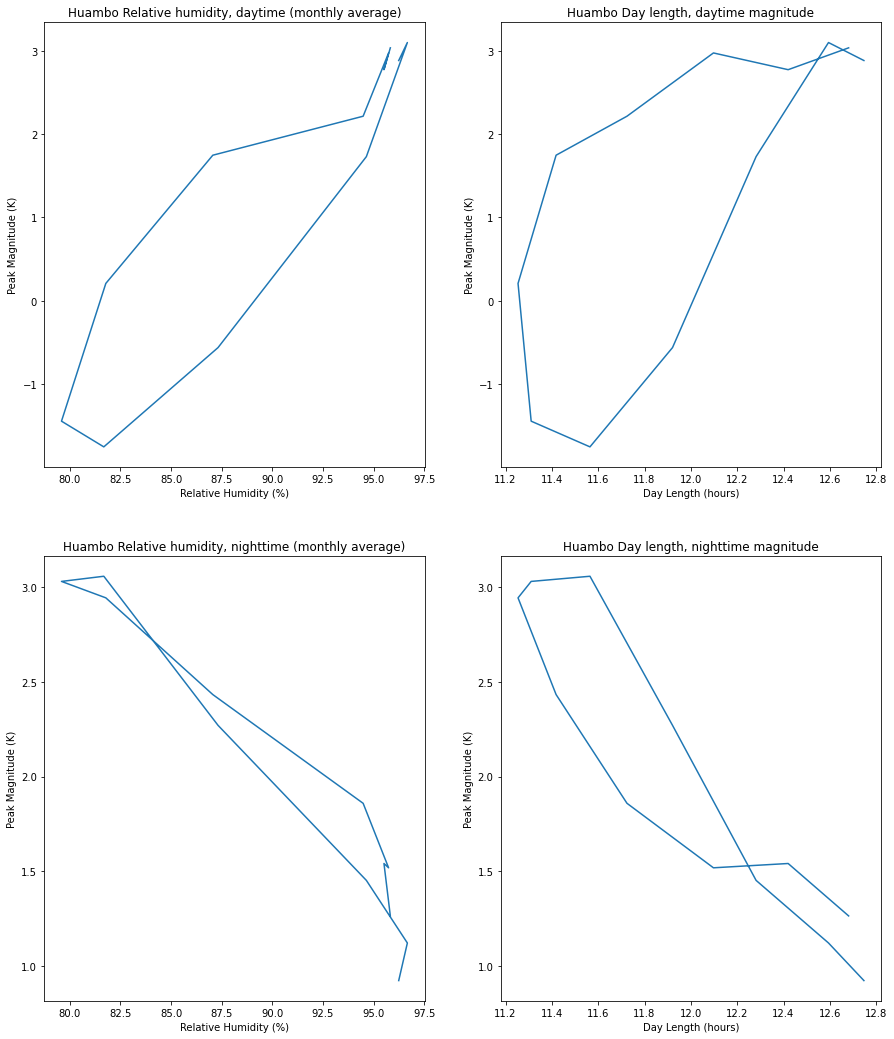

In [120]:
#plot

fig, axes = plt.subplots(nrows = 2,ncols = 2, figsize=(15, 18))

axes[0,0].plot(monthly_day_df.rh, monthly_day_df.day_a0)
axes[0,0].set_title('{} Relative humidity, daytime (monthly average)'.format(City_name))
axes[0,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')

axes[0,1].plot(monthly_day_df.day_length, monthly_day_df.day_a0)
axes[0,1].set_title('{} Day length, daytime magnitude'.format(City_name))
axes[0,1].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Day Length (hours)')


axes[1,0].plot(monthly_night_df.rh, monthly_night_df.night_a0)
axes[1,0].set_title('{} Relative humidity, nighttime (monthly average)'.format(City_name))
axes[1,0].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Relative Humidity (%)')

axes[1,1].plot(monthly_day_df.day_length, monthly_night_df.night_a0)
axes[1,1].set_title('{} Day length, nighttime magnitude'.format(City_name))
axes[1,1].set(ylabel = 'Peak Magnitude (K)', xlabel = 'Day Length (hours)')

#save 
plt.savefig('{}_SUHI_mag_v_climate.png'.format(City_name))

[Text(0, 0.5, 'rh (%)'), Text(0.5, 0, 'Day Length (hours)')]

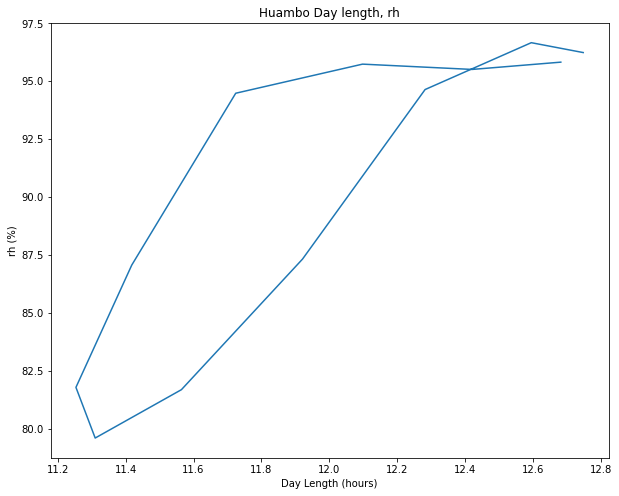

In [121]:
fig, axes = plt.subplots(figsize=(10, 8))
axes.plot(monthly_day_df.day_length, monthly_day_df.rh)
axes.set_title('{} Day length, rh'.format(City_name))
axes.set(ylabel = 'rh (%)', xlabel = 'Day Length (hours)')


[Text(0, 0.5, 't2m (K)'), Text(0.5, 0, 'Day Length (hours)')]

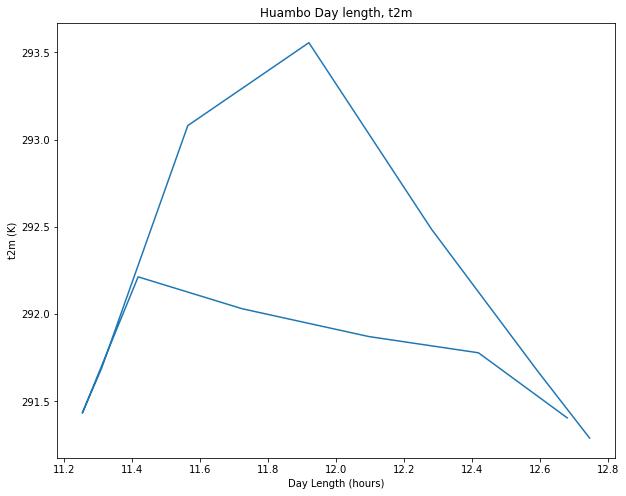

In [122]:
fig, axes = plt.subplots(figsize=(10, 8))
axes.plot(monthly_day_df.day_length, monthly_day_df.t2m)
axes.set_title('{} Day length, t2m'.format(City_name))
axes.set(ylabel = 't2m (K)', xlabel = 'Day Length (hours)')
